# 13. Radon-Nikodym Derivatives

**Goal:** Visualize how one measure relates to another via a density.

If $\nu \ll \mu$ (absolutely continuous), the **Radon-Nikodym theorem** gives a density $f = d\nu/d\mu$ such that $\nu(A) = \int_A f \, d\mu$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Example 1: Change of Measure Between Normals

If $\mu = N(0,1)$ and $\nu = N(\theta, 1)$, then $d\nu/d\mu(x) = e^{\theta x - \theta^2/2}$.

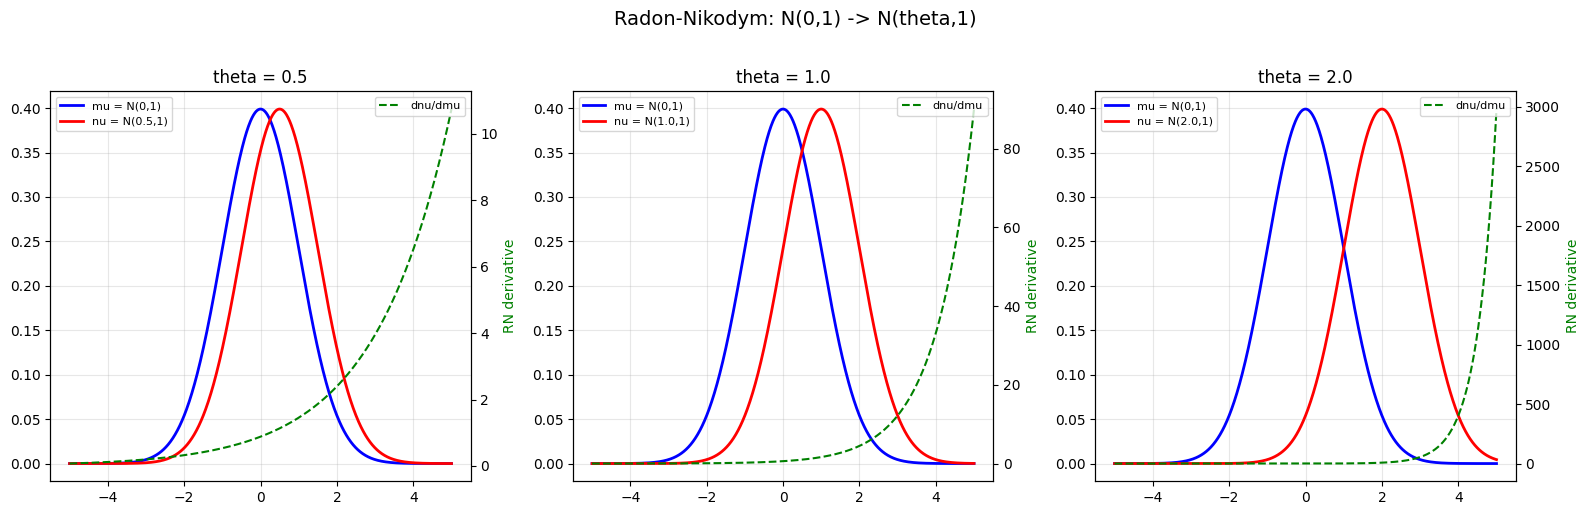

In [2]:
x = np.linspace(-5, 5, 1000)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

thetas = [0.5, 1.0, 2.0]
for ax, theta in zip(axes, thetas):
    mu_pdf = stats.norm.pdf(x, 0, 1)
    nu_pdf = stats.norm.pdf(x, theta, 1)
    rn = np.exp(theta * x - theta**2 / 2)
    
    ax.plot(x, mu_pdf, 'b-', linewidth=2, label='mu = N(0,1)')
    ax.plot(x, nu_pdf, 'r-', linewidth=2, label=f'nu = N({theta},1)')
    ax2 = ax.twinx()
    ax2.plot(x, rn, 'g--', linewidth=1.5, label='dnu/dmu')
    ax2.set_ylabel('RN derivative', color='green')
    ax.set_title(f'theta = {theta}', fontsize=12)
    ax.legend(loc='upper left', fontsize=8)
    ax2.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
plt.suptitle('Radon-Nikodym: N(0,1) -> N(theta,1)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Example 2: Empirical Density Estimation

Given samples from $\nu$, we can estimate $d\nu/d\mu$ by the ratio of densities.

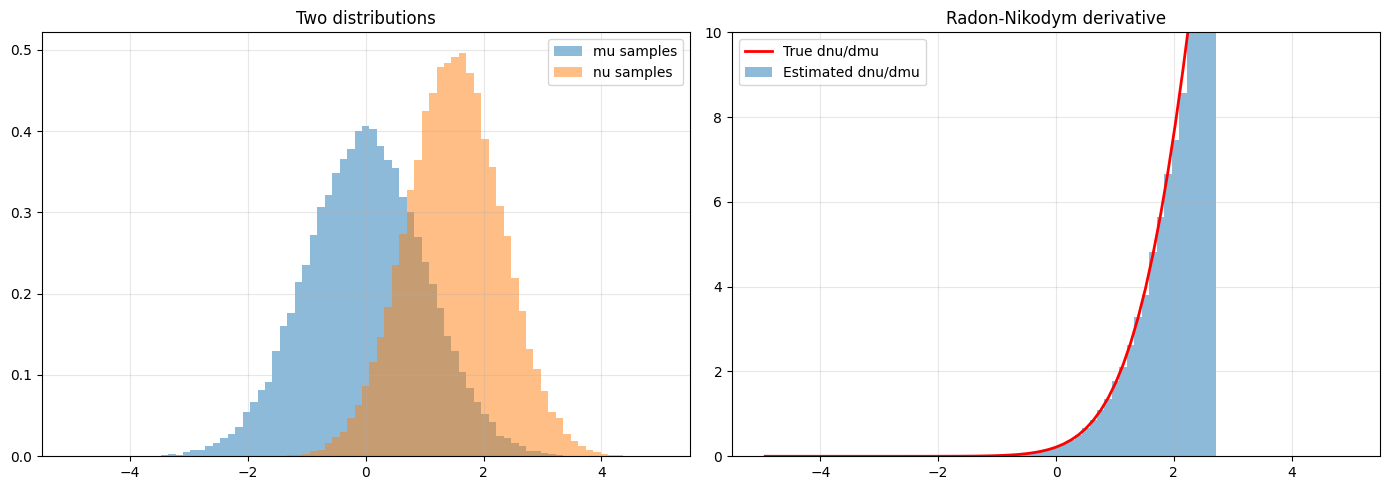

In [3]:
np.random.seed(42)
n_samples = 50000
samples_mu = np.random.normal(0, 1, n_samples)
samples_nu = np.random.normal(1.5, 0.8, n_samples)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
bins = np.linspace(-5, 5, 80)
ax1.hist(samples_mu, bins=bins, density=True, alpha=0.5, label='mu samples')
ax1.hist(samples_nu, bins=bins, density=True, alpha=0.5, label='nu samples')
ax1.set_title('Two distributions', fontsize=12)
ax1.legend(); ax1.grid(True, alpha=0.3)

# Estimate RN derivative
hist_mu, edges = np.histogram(samples_mu, bins=bins, density=True)
hist_nu, _ = np.histogram(samples_nu, bins=bins, density=True)
centers = (edges[:-1] + edges[1:]) / 2
mask = hist_mu > 0.01
rn_empirical = np.zeros_like(hist_mu, dtype=float)
rn_empirical[mask] = hist_nu[mask] / hist_mu[mask]
rn_true = stats.norm.pdf(centers, 1.5, 0.8) / stats.norm.pdf(centers, 0, 1)

ax2.bar(centers, rn_empirical, width=edges[1]-edges[0], alpha=0.5, label='Estimated dnu/dmu')
ax2.plot(centers, rn_true, 'r-', linewidth=2, label='True dnu/dmu')
ax2.set_title('Radon-Nikodym derivative', fontsize=12)
ax2.legend(); ax2.grid(True, alpha=0.3); ax2.set_ylim(0, 10)
plt.tight_layout()
plt.show()

## Singular Measures

When $\nu$ is **singular** w.r.t. $\mu$, no density exists. The Lebesgue decomposition:
$\nu = \nu_{ac} + \nu_s$ splits into absolutely continuous and singular parts.

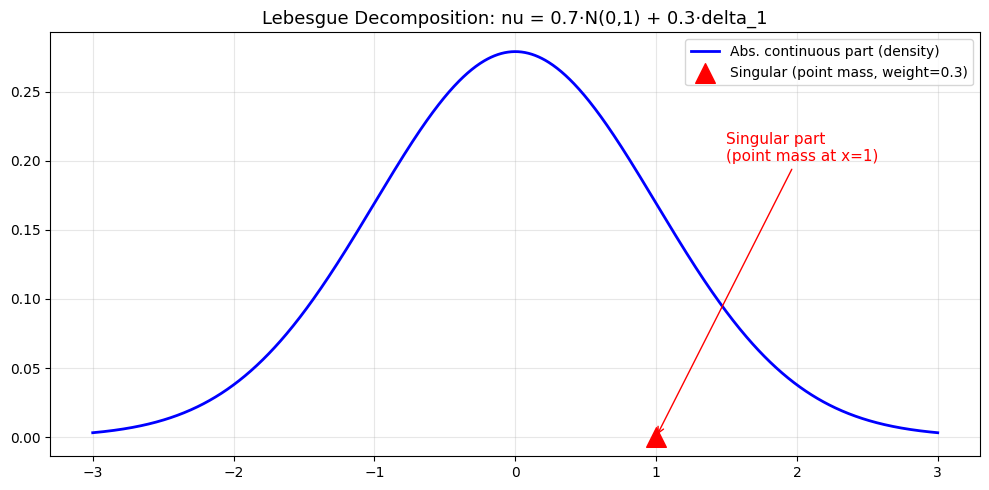

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-3, 3, 1000)
ac_pdf = 0.7 * stats.norm.pdf(x, 0, 1)
ax.plot(x, ac_pdf, 'b-', linewidth=2, label='Abs. continuous part (density)')
ax.annotate('Singular part\n(point mass at x=1)',
           xy=(1, 0), xytext=(1.5, 0.2),
           arrowprops=dict(arrowstyle='->', color='red'),
           fontsize=11, color='red')
ax.scatter([1], [0], s=200, c='red', zorder=5, marker='^', label='Singular (point mass, weight=0.3)')
ax.set_title('Lebesgue Decomposition: nu = 0.7·N(0,1) + 0.3·delta_1', fontsize=13)
ax.legend(); ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Radon-Nikodym theorem:** abs. continuous measures have densities.
2. **Change of measure** (likelihood ratio) is a Radon-Nikodym derivative.
3. **Singular measures** have no density — the Lebesgue decomposition separates them.
4. Central to probability (likelihood ratios, Bayesian inference, importance sampling).